# Intiliasation Phase

### Download libraries

In [ ]:
pip install seaborn -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


### Importing Libraries

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf

from wordcloud import WordCloud
from tensorflow.keras import layers, models, losses, metrics, Sequential, optimizers


: 

### Read Training Data CSV

In [ ]:
tweets_data= pd.read_csv('Tweets.csv')

tweets_data.sample(10)


,textID,text,selected_text,sentiment
16127,d3bad979c8,thats because im getting a new phone since my...,thats because im getting a new phone since my ...,neutral
14283,22d7ee60ad,boo you can come over and we`ll watch teleno...,boo you can come over and we`ll watch telenov...,neutral
27349,f60f20ed09,"yea but that`s an old pic, she looks a lot d...","yea but that`s an old pic, she looks a lot di...",neutral
11005,414bc62f47,aww I have to go to class on that day... So ...,e weird,negative
13371,699bf8c9ce,"Ahh that`s fun I had work last night, a part...",Ahh that`s fun,positive
6566,0dbaca8e07,goood,goood,positive
9878,6f6f3a42d2,Hey #socialmediatv ugh no way to do video>blah...,ugh no way,negative
26484,f539ec0447,I want to go to Peru this summer ahhhhhhh! Hop...,I want to go to Peru this summer ahhhhhhh! Hop...,neutral
2006,01942ec563,_Ada_Franco I am working again! Woo hoo! Ala...,"Woo hoo! Alas,",neutral
20794,f19fcbaa3b,thanks to for becoming a follower,thanks to,positive


### Inspect Data Types

In [ ]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


### Ensure that there no null values in the data

In [ ]:
tweets_data.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

### Drop all Null data

In [ ]:
tweets_data = tweets_data.dropna()

tweets_data.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

### Check for duplicates in data

In [ ]:
tweets_data.duplicated().sum()

0

### Prepare data for training by dropping the unneccessary columns  

In [ ]:
tweets_data = tweets_data.drop(columns =['selected_text', 'textID'])

tweets_data.sample(10)

,text,sentiment
2743,aw honey... you just relaxin? That`s probably...,positive
13318,no southland this wk,neutral
2554,You may be PC but I love you anyway!!! Maybe...,positive
10718,Nice we didn`t see the fireworks but we sure ...,positive
1017,Very content with my life at the moment,neutral
18851,so the beneath show got cancelled BUMMER! i g...,negative
26355,_life Hey i like love iCarly it rocks. my y...,positive
1782,looking forward to coffee and driving tomorrow...,positive
26128,Tomorrow`s mother`s day. I need to get all my ...,positive
24404,_ yeah,neutral


# Analysation Phase

### Check how many records per sentiment label

In [ ]:
tweets_data['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

Visualise the sentiment count information

<Axes: xlabel='sentiment', ylabel='count'>

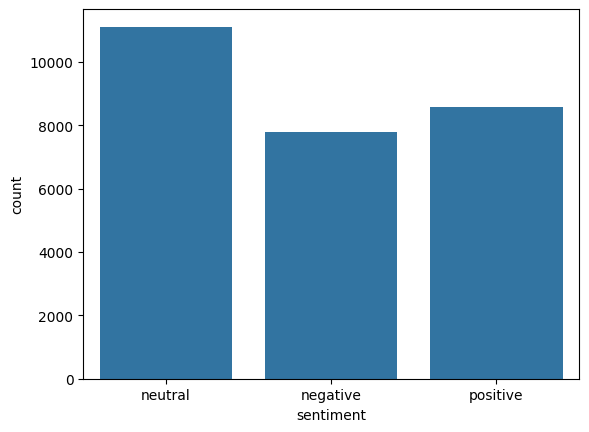

In [ ]:
# using the seaborn library to draw a bar chart

sns.countplot(tweets_data, x = 'sentiment')

### Check if the length of tweets differ widely

In [ ]:
tweets_data['word_count'] = tweets_data['text'].apply(lambda x: len(str(x).split(" ")))

tweets_data[['text', 'word_count']].sample(10)

,text,word_count
18770,u dont have to quit smoking http://bit.ly/CHZLW,9
11283,Shots suuuuck! im done no more vacines!,9
20991,WTF!!!! LMAO!!! *Just got hit in the head wi...,13
26908,"ok, back to the dentist today. All I want to d...",16
14034,listing to music while putting the finishing t...,24
22226,Again documentation day,3
14615,Sick kid trumps advance planning. Bummer,7
812,very relaxing thank you. Hope you get to put ...,18
15389,Tat PsP! Its ma fathers name. Hw did it end u...,27
13094,"I`ll try that, thanks",5


### Check if the word length of tweets differ based on sentiment

In [ ]:
tweets_data.groupby("sentiment")["word_count"].mean()

sentiment
negative    14.244313
neutral     13.207610
positive    14.100210
Name: word_count, dtype: float64

In [ ]:
tweets_data.groupby('sentiment')['word_count'].median()

sentiment
negative    13.0
neutral     12.0
positive    13.0
Name: word_count, dtype: float64

Visualise the distrbution of how many tweets for the different lenghts of words using a histogram

<Axes: xlabel='word_count', ylabel='Count'>

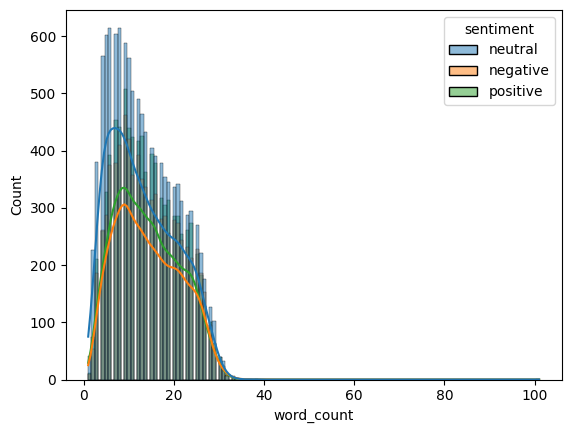

In [ ]:
sns.histplot(data = tweets_data , x = 'word_count', hue = 'sentiment', kde = True)

Other way to visualise the info using a box plot to allow the viewing of the inter-quartiale range and the median of tweets of different catagories

<Axes: ylabel='word_count'>

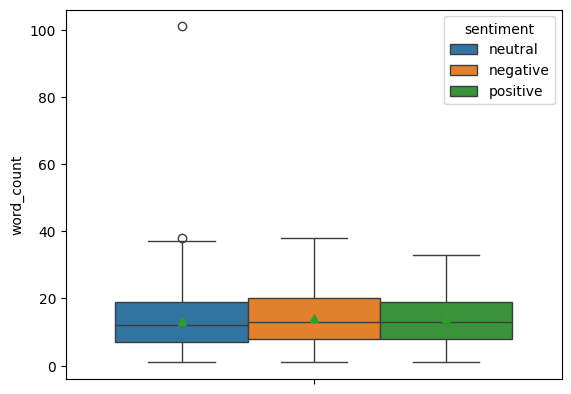

In [ ]:
sns.boxplot(data = tweets_data, y = 'word_count', hue = 'sentiment', showmeans = True)

# Cleaning and Preproccesing Text Phase

### Get rid of StopWords from our text

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Normalise or Standardise the data

In [ ]:
import string

def custom_normalisation(input_data):

    # Convert to lowercase
    lowercase = tf.strings.lower(input_data)

    # Remove URLs
    stripped_urls = tf.strings.regex_replace(lowercase, r"https?://\S+|www\.\S+", "")

    # Remove email addresses
    stripped_symbol = tf.strings.regex_replace(stripped_urls, "\S*@\S*\s?", "")

    # Remove text in angular brackets (usually HTML tags)
    stripped_brackets = tf.strings.regex_replace(stripped_symbol, "<.*?>+", "")

    # Remove any square brackets and leave the text within square brackets
    stripped_brackets = tf.strings.regex_replace(stripped_brackets, "\[|\]", "")

    # Matches alphanumeric characters with digits and remove those
    stripped_digits = tf.strings.regex_replace(stripped_brackets, "\w*\d\w*", "")

    # Remove stopwords
    stripped_stopwords = tf.strings.regex_replace(stripped_digits, r"\b(?:{})\b".format("|".join(stop_words)), "")

    # Replace multiple whitespaces with a single whitespace
    stripped_whitespace_chars = tf.strings.regex_replace(stripped_stopwords, "\s+", " ")

    # Remove non-alphabet characters
    return tf.strings.regex_replace(stripped_whitespace_chars ,r"[^a-zA-Z\s]+" ,"")

The above function will be applied on all the text data to clean it up before it is used for the sentiment analysis model training.

Here is an example of how the data will look like after it is cleaned.

First take a random tweet's text data

In [ ]:
tweets_data['text'][10]

' as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff'

Then apply the function to it.

In [ ]:
custom_normalisation(tweets_data['text'][10]).numpy()

b' much love hopeful reckon chances minimal p  never gonna get cake stuff'

As shown above all unnessecary text that doesnot contribute or affect the text sentiment such as:

* Digits
* Brackets
* Stopwords
* Punctuations
* Emails
* URLs

are removed.

Apply the normalisation of all the texts in the dataframe

In [ ]:
tweets_data['cleaned_text'] = tweets_data['text'].apply(custom_normalisation)

tweets_data.sample(10)

,text,sentiment,word_count,cleaned_text
6413,snotty nose poorly chest! this is not good!,negative,9,"tf.Tensor(b'snotty nose poorly chest good', sh..."
16062,I am also very tired,negative,6,"tf.Tensor(b' also tired', shape=(), dtype=string)"
9950,"Im going to go to bed again, ear (both) infect...",negative,23,tf.Tensor(b'im going go bed ear infection co...
26483,SEND ME THAT PHOTO MAN ily favourite,positive,9,"tf.Tensor(b' send photo man ily favourite', sh..."
7852,Maybe until Wednesday?,neutral,4,"tf.Tensor(b' maybe wednesday', shape=(), dtype..."
27217,We don`t feel too comfortable using it. It`s...,negative,21,tf.Tensor(b' feel comfortable using awful p...
12576,"oooh...I wish I could`ve gone there today, to...",positive,19,tf.Tensor(b' oooh wish could gone today know ...
3473,"what about the dilfs? Oh wait, wrong month......",positive,11,tf.Tensor(b' dilfs oh wait wrong monthhappy mo...
5410,absolutely nothin,neutral,3,"tf.Tensor(b' absolutely nothin', shape=(), dty..."
8933,not for too long I hope x,neutral,9,"tf.Tensor(b' long hope x', shape=(), dtype=str..."


Convert the tensor format of the cleaned_text to strings

In [ ]:
def tensor_to_string(tensor):
  return tensor.numpy().decode('utf-8') # Assuming that the encoding is UTF-8

tweets_data['cleaned_text'] = tweets_data['cleaned_text'].apply(tensor_to_string)

tweets_data

,text,sentiment,word_count,cleaned_text
0,"I`d have responded, if I were going",neutral,8,responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,11,sooo sad miss san diego
2,my boss is bullying me...,negative,5,boss bullying
3,what interview! leave me alone,negative,6,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,15,sons put releases already bought
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,18,wish could come see u denver husband lost job...
27477,I`ve wondered about rake to. The client has ...,negative,26,wondered rake client made clear net force...
27478,Yay good for both of you. Enjoy the break - y...,positive,24,yay good enjoy break probably need hectic w...
27479,But it was worth it ****.,positive,8,worth


### Visualise the tweets of different sentiment labels usig WordCloud

WordCloud is useful library that presents words from the text data in different sizes based on the word frequency of occurance.

Using this library, the ability to find keywords that might influence the sentiment of a text become more apparent and helps in understanding the correlation of those keywords to certain sentiment label.



1. **Positive Sentiment**

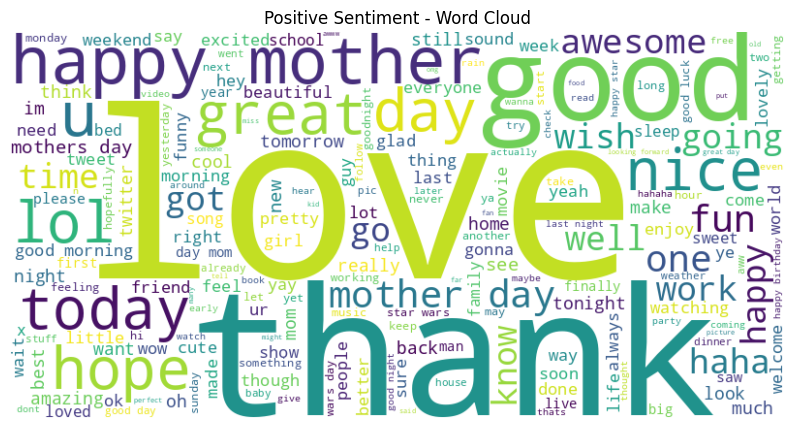

In [ ]:
# Extract texts from positive sentiment tweets
positive_tweets = tweets_data[tweets_data['sentiment'] == 'positive' ]['cleaned_text']

# Concate all positive sentiment text into one string
positive_text = " ".join(positive_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(positive_text)

# Plot the WordCloud
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.title("Positive Sentiment - Word Cloud")
plt.show()

2. **Neutral Sentiment**

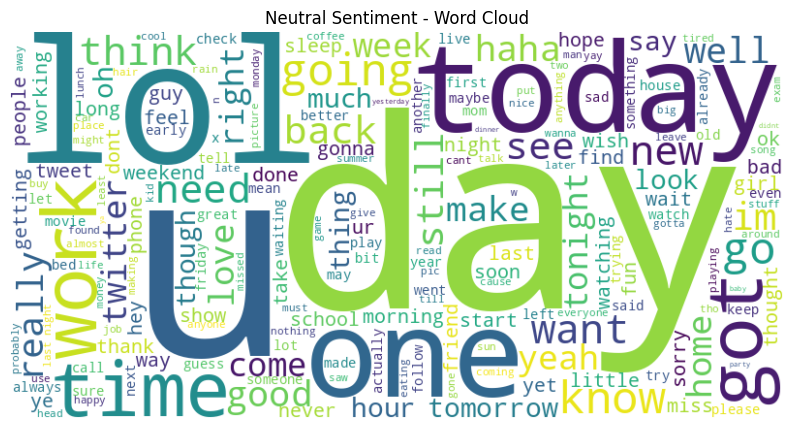

In [ ]:
# Extract texts from neutral sentiment tweets
neutral_tweets = tweets_data[tweets_data['sentiment'] == 'neutral' ]['cleaned_text']

# Concate all positive sentiment text into one string
neutral_text = " ".join(neutral_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(neutral_text)

# Plot the WordCloud
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.title("Neutral Sentiment - Word Cloud")
plt.show()

3. **Negative Sentiment**

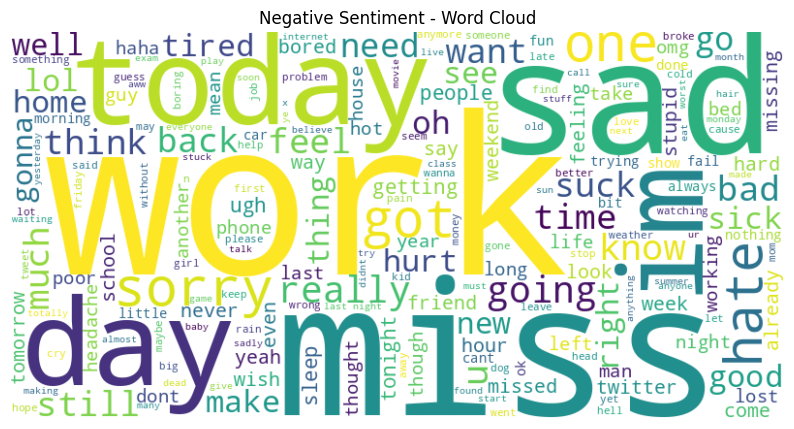

In [ ]:
# Extract texts from negative sentiment tweets
negative_tweets = tweets_data[tweets_data['sentiment'] == 'negative' ]['cleaned_text']

# Concate all negative sentiment text into one string
negative_text = " ".join(negative_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(negative_text)

# Plot the WordCloud
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.title("Negative Sentiment - Word Cloud")
plt.show()

# Data Setup for Model Training Phase

### Spliting the data into training, test, and valdation sets

First convert sentiment labels into numeric values

In [ ]:
tweets_data['sentiment'] = tweets_data['sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})

tweets_data.sample(10)

,text,sentiment,word_count,cleaned_text
23114,So wish the Carlton game was on live stupid c...,0,13,wish carlton game live stupid channel lol
27200,No clubbing for me this weekend due to a buste...,0,14,clubbing weekend due busted knee life unfair
23550,_NKOTB LOL you r not a loser u drove 8 hours i...,2,27,nkotb lol r loser u drove hours day u need res...
17900,Sorry I`m not using tweetdeck it`s not letting...,0,11,sorry using tweetdeck letting tweet today
10852,ahaha i know. but now i can`t do anything ove...,0,13,ahaha know anything weekend
16936,finds the hardest thing about being a Christia...,0,21,finds hardest thing christian put god first li...
6784,Not yet... sorry,0,4,yet sorry
14632,knee surgery.... back home for about 6 weeks,1,8,knee surgery back home weeks
17065,Making yet another attempt to attend church on...,1,17,making yet another attempt attend church sunda...
14437,_baffoon ooh if youre on the computer making y...,0,21,baffoon ooh youre computer making playlist com...


The above step is necessary, since neural network models dont understand categorical data in forms of strings

Then split the data into training, test, and valdiation sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(tweets_data, test_size = 0.2, stratify = tweets_data["sentiment"], random_state = 123)
X_train, X_val = train_test_split(X_train, test_size = 0.1, stratify = X_train["sentiment"], random_state = 123)

X_train.shape, X_val.shape, X_test.shape

((19785, 4), (2199, 4), (5496, 4))

Check that the proportion of tweets between each sentiment across the sets is aproximately close

In [ ]:
X_train['sentiment'].value_counts()

sentiment
1    8005
2    6178
0    5602
Name: count, dtype: int64

In [ ]:
X_val['sentiment'].value_counts()

sentiment
1    889
2    687
0    623
Name: count, dtype: int64

In [ ]:
X_test['sentiment'].value_counts()

sentiment
1    2223
2    1717
0    1556
Name: count, dtype: int64

### Represent the training, test, and validation data using TensorFlow Datasets

TensorFlow Datasets data structure is useful tool to use when it comes to  efficently manage and process large amounts of data.

It also have multiple mechanisms that optimise the training of the model.

In [ ]:
raw_train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train["text"].values, X_train["sentiment"].values)).shuffle(1024).batch(batch_size = 128)

raw_val_ds = tf.data.Dataset.from_tensor_slices(
    (X_val["text"].values, X_val["sentiment"].values)).batch(batch_size = 128)

raw_test_ds = tf.data.Dataset.from_tensor_slices(
    (X_test["text"].values, X_test["sentiment"].values)).batch(batch_size = 128)

len(raw_train_ds), len(raw_val_ds), len(raw_test_ds)

(155, 18, 43)

# Using Count Vectoriser

### Convert text data into numerical vectors

In [ ]:
vocab_size = 30

count_vectoriser = layers.TextVectorization(
    standardize = "lower_and_strip_punctuation",
    max_tokens = vocab_size,
    output_mode = "count",
)


### Example usage for better understanding

In [ ]:
# list of text documents
text = ["Malcolm is an amazing painter. Malcolm also loves watching cricket",
        "Dean cooks well",
        "Malcolm is a decent footballer too",
        "Chris is a teacher, he is quite experienced in teaching"]

In [ ]:
count_vectoriser.adapt(text)

In [ ]:
count_vectoriser.get_vocabulary()

['[UNK]',
 'is',
 'malcolm',
 'a',
 'well',
 'watching',
 'too',
 'teaching',
 'teacher',
 'quite',
 'painter',
 'loves',
 'in',
 'he',
 'footballer',
 'experienced',
 'decent',
 'dean',
 'cricket',
 'cooks',
 'chris',
 'an',
 'amazing',
 'also']

In [ ]:
count_vectoriser(text)

<tf.Tensor: shape=(4, 24), dtype=int64, numpy=
array([[0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0],
       [0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0]])>

### Apply count vectoriser to the sets

In [ ]:
vocab_size = 10000

count_vectoriser = layers.TextVectorization(
    standardize = custom_normalisation,
    max_tokens = vocab_size,
    output_mode = "count",
    ngrams = (1, 2)
)



Next call adapt to fit the state of the preprocessing layer to the dataset. this step is essintial since it allow the model to build an index of strings to integers.

In [ ]:
#Make text-only data without labels

train_text = raw_train_ds.map(lambda x, y: x)

count_vectoriser.adapt(train_text)

Next Create a helper function to make sure that vector is in the correct format that can be fed into  our model

In [ ]:
def vectorise_text(text, label):

  text = tf.expand_dims(text, -1)
  return count_vectoriser(text), label

example usage

In [ ]:
import sys

np.set_printoptions(threshold = sys.maxsize)

class_names = ['negative', 'neutral', 'positive']
text_batch, label_batch = next(iter(raw_train_ds))
first_tweet, first_label = text_batch[0], label_batch[0]

print("Tweet:", first_tweet)
print("Label:", class_names[first_label])
print("Vectorized tweet:", vectorise_text(first_tweet, first_label))

Tweet: tf.Tensor(b' I KNOW! I love Nicholas Braun & I think he`ll make an okay Cameron but I don`t wanna see it either', shape=(), dtype=string)
Label: positive
Vectorized tweet: (<tf.Tensor: shape=(1, 10000), dtype=int64, numpy=
array([[10,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

In [ ]:
count_vectoriser.get_vocabulary()

['[UNK]',
 'day',
 'good',
 'get',
 'like',
 'go',
 'today',
 'love',
 'going',
 'work',
 'got',
 'one',
 'time',
 'lol',
 'know',
 'happy',
 'u',
 'really',
 'back',
 'im',
 'see',
 'night',
 'new',
 'home',
 'think',
 'want',
 'well',
 'oh',
 'much',
 'still',
 'thanks',
 'miss',
 'great',
 'last',
 'need',
 'morning',
 'haha',
 'hope',
 'would',
 'feel',
 'fun',
 'tomorrow',
 'sorry',
 'twitter',
 'wish',
 'bad',
 'make',
 'tonight',
 'sad',
 'right',
 'week',
 'yeah',
 'nice',
 'way',
 'mother',
 'gonna',
 'though',
 'better',
 'sleep',
 'could',
 'weekend',
 'come',
 'next',
 'people',
 'bed',
 'getting',
 'mothers',
 'wait',
 'watching',
 'mother day',
 'hate',
 'days',
 'say',
 'awesome',
 'thing',
 'school',
 'dont',
 'even',
 'mom',
 'soon',
 'yes',
 'long',
 'little',
 'show',
 'best',
 'working',
 'sure',
 'never',
 'ok',
 'thank',
 'done',
 'mothers day',
 'tired',
 'hey',
 'cool',
 'feeling',
 'take',
 'cant',
 'happy mother',
 'everyone',
 'look',
 'first',
 'please',
 'l

### Final preproccessing step

applying Textvectroization layer that was created in the above to the train, val, and test data

In [ ]:
train_ds = raw_train_ds.map(vectorise_text)
val_ds = raw_val_ds.map(vectorise_text)
test_ds = raw_test_ds.map(vectorise_text)

# Model Creation and Training Phase


### setup optimisation for the data loading

storing the data in a cache to prevent the constant retriving of data from the disk as well as prefetching the data so the elements will be prefetched ahead of the time they're needed to train the model. finally i will Autotune the number of elements to prefetch

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

### Create a simple dense neural network

In [ ]:
dnn_model = Sequential([
    layers.Dense(64, activation = 'tanh'),
    layers.Dropout(0.1),
    layers.Dense(32, activation = 'tanh'),
    layers.Dropout(0.1),
    layers.Dense(3)
])

dnn_model.compile(optimizers.Adam(learning_rate = 0.0001) ,
            loss = losses.SparseCategoricalCrossentropy(from_logits = True),
            metrics = ["accuracy"])

input_shape = (None, 10000)

dnn_model.build(input_shape)

dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642,243 (2.45 MB)

 Trainable params: 642,243 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

### Train Model

In [ ]:
history = dnn_model.fit(
    train_ds,
    epochs = 10,
    validation_data = val_ds)

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.4016 - loss: 1.0880 - val_accuracy: 0.5093 - val_loss: 1.0323
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.5611 - loss: 1.0054 - val_accuracy: 0.6094 - val_loss: 0.9536
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6602 - loss: 0.9033 - val_accuracy: 0.6535 - val_loss: 0.8728
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7109 - loss: 0.7959 - val_accuracy: 0.6717 - val_loss: 0.8143
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7452 - loss: 0.7084 - val_accuracy: 0.6826 - val_loss: 0.7806
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7656 - loss: 0.6425 - val_accuracy: 0.6889 - val_loss: 0.7636
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7835 - loss: 0.5891 - val_accuracy: 0.6889 - val_loss: 0.7597
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8021 - loss: 0.5442 - val_accuracy

Evalute model

In [ ]:
loss, accuracy = dnn_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.6754 - loss: 0.7873
Loss:  0.8028736114501953
Accuracy:  0.6774017214775085


Accuracy and Loss are plotted wrt epochs

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
history_dict

{'accuracy': [0.4511498510837555,
  0.5783169269561768,
  0.6643922328948975,
  0.7124083638191223,
  0.7443518042564392,
  0.7665908336639404,
  0.7851402759552002,
  0.804144561290741,
  0.8198635578155518,
  0.8315895795822144],
 'loss': [1.0694019794464111,
  0.9857132434844971,
  0.8816581964492798,
  0.7791224718093872,
  0.6975114345550537,
  0.6338048577308655,
  0.5827023983001709,
  0.5389174222946167,
  0.5026386976242065,
  0.4698736071586609],
 'val_accuracy': [0.5093224048614502,
  0.6093679070472717,
  0.6534788608551025,
  0.6716689467430115,
  0.6825829744338989,
  0.6889495253562927,
  0.6889495253562927,
  0.6921327710151672,
  0.6907685399055481,
  0.6903137564659119],
 'val_loss': [1.032332420349121,
  0.953565776348114,
  0.8728412985801697,
  0.8142825961112976,
  0.7805805206298828,
  0.7636163234710693,
  0.7596616744995117,
  0.7632307410240173,
  0.7735166549682617,
  0.7874113321304321]}

visulaize the model training

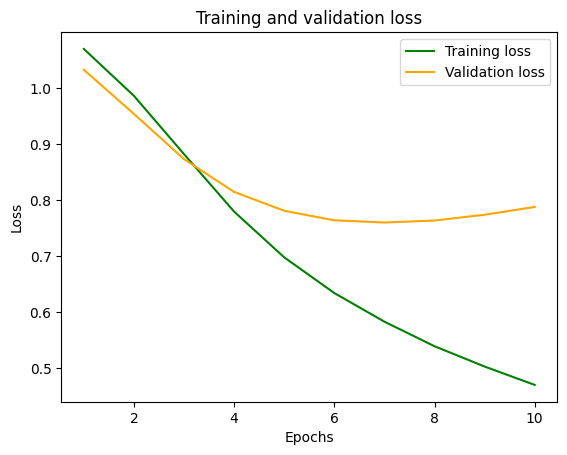

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = 'Green', label = 'Training loss')
plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


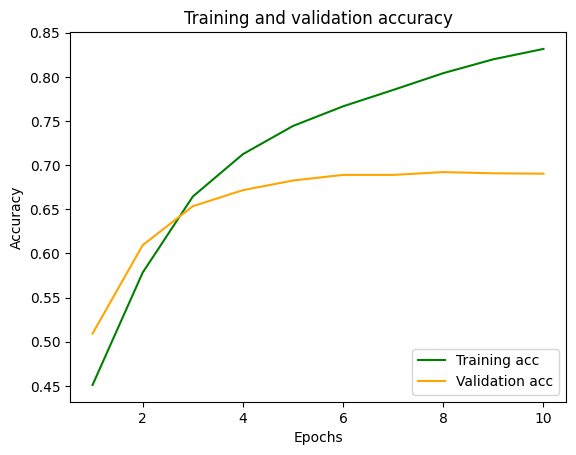

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

### Export the model and test it with raw data

In [ ]:
export_model = Sequential([
    count_vectoriser,
    dnn_model
])

export_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.0001),
    metrics = ["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
#loss, accuracy = export_model.evaluate(raw_test_ds)
#print(accuracy)
export_model.evaluate(raw_test_ds)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_5" is incompatible with the layer: expected shape=(None, 1000), found shape=(None, 10000)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(None, 10000), dtype=float32, sparse=False, name=keras_tensor_43>',)
  • kwargs={'mask': 'None'}

### create a classfication report for the predictions of the model

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            classification_report

predictions = export_model.predict(X_test['text'].values)
y_pred = np.argmax(predictions, axis = 1)
y_test = X_test['sentiment']

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = None)
precision = precision_score(y_test, y_pred, average = None)
recall = recall_score(y_test, y_pred, average = None)

report = classification_report(y_test, y_pred)

print(report)

print("-------------------------")

print("Accuracy:",accuracy)

172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      1556
           1       0.64      0.69      0.66      2223
           2       0.73      0.71      0.72      1717

    accuracy                           0.68      5496
   macro avg       0.68      0.67      0.68      5496
weighted avg       0.68      0.68      0.68      5496

-------------------------
Accuracy: 0.6774017467248908


# Using TF-IDF Vectoriser instead of Count vectoriser

try it on a sample of the text to understand how it works

In [ ]:
vocab_size = 30

tfidf_vectoriser = layers.TextVectorization(
    standardize = "lower_and_strip_punctuation",
    max_tokens = vocab_size,
    output_mode = "tf_idf",
)

In [ ]:
text = ["Malcolm is an amazing painter. Malcolm also loves watching cricket",
        "Dean cooks well",
        "Malcolm is a decent footballer too",
        "Chris is a teacher, he is quite experienced in teaching"]

In [ ]:
tfidf_vectoriser.adapt(text)

In [ ]:
tfidf_vectoriser.get_vocabulary()

['[UNK]',
 'is',
 'malcolm',
 'a',
 'well',
 'watching',
 'too',
 'teaching',
 'teacher',
 'quite',
 'painter',
 'loves',
 'in',
 'he',
 'footballer',
 'experienced',
 'decent',
 'dean',
 'cricket',
 'cooks',
 'chris',
 'an',
 'amazing',
 'also']

In [ ]:
tfidf_vectoriser(text)

<tf.Tensor: shape=(4, 24), dtype=float32, numpy=
array([[0.        , 0.6931472 , 1.6945957 , 0.        , 0.        ,
        1.0986123 , 0.        , 0.        , 0.        , 0.        ,
        1.0986123 , 1.0986123 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.0986123 , 0.        ,
        0.        , 1.0986123 , 1.0986123 , 1.0986123 ],
       [0.        , 0.        , 0.        , 0.        , 1.0986123 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.0986123 , 0.        , 1.0986123 ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.6931472 , 0.84729785, 0.84729785, 0.        ,
        0.        , 1.0986123 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.0986123 ,
        0.        , 1.0986123 , 0.        , 0.        , 0.        ,
        0.        , 0

Apply it to all the training texts

In [ ]:
vocab_size = 10000

tfidf_vectoriser = layers.TextVectorization(
    standardize = custom_normalisation,
    max_tokens = vocab_size,
    output_mode = "tf_idf",
    ngrams = (1, 2)
)

tfidf_vectoriser.adapt(train_text)

check how the vocalabrly look like after TF-IDF

In [ ]:
tfidf_vectoriser.get_vocabulary()

['[UNK]',
 'day',
 'good',
 'get',
 'like',
 'go',
 'today',
 'love',
 'going',
 'work',
 'got',
 'one',
 'time',
 'lol',
 'know',
 'happy',
 'u',
 'really',
 'back',
 'im',
 'see',
 'night',
 'new',
 'home',
 'think',
 'want',
 'well',
 'oh',
 'much',
 'still',
 'thanks',
 'miss',
 'great',
 'last',
 'need',
 'morning',
 'haha',
 'hope',
 'would',
 'feel',
 'fun',
 'tomorrow',
 'sorry',
 'twitter',
 'wish',
 'bad',
 'make',
 'tonight',
 'sad',
 'right',
 'week',
 'yeah',
 'nice',
 'way',
 'mother',
 'gonna',
 'though',
 'better',
 'sleep',
 'could',
 'weekend',
 'come',
 'next',
 'people',
 'bed',
 'getting',
 'mothers',
 'wait',
 'watching',
 'mother day',
 'hate',
 'days',
 'say',
 'awesome',
 'thing',
 'school',
 'dont',
 'even',
 'mom',
 'soon',
 'yes',
 'long',
 'little',
 'show',
 'best',
 'working',
 'sure',
 'never',
 'ok',
 'thank',
 'done',
 'mothers day',
 'tired',
 'hey',
 'cool',
 'feeling',
 'take',
 'cant',
 'happy mother',
 'everyone',
 'look',
 'first',
 'please',
 'l

setup the same helper function used in the count vectoriser approach

In [ ]:
def vectorise_text(text, label):

  text = tf.expand_dims(text, -1)
  return tfidf_vectoriser(text), label

setup the three data sets  

In [ ]:
train_ds = raw_train_ds.map(vectorise_text)
val_ds = raw_val_ds.map(vectorise_text)
test_ds = raw_test_ds.map(vectorise_text)

optimise for dataloading again

In [ ]:
Autotune = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = Autotune)
val_ds = val_ds.cache().prefetch(buffer_size = Autotune)
test_ds = test_ds.cache().prefetch(buffer_size = Autotune)

## setup the same model as before

In [ ]:
dnn_model = Sequential([
    layers.Dense(64, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(32, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(3)
])

dnn_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.00001),
    metrics = ["accuracy"]
)

history = dnn_model.fit(
    train_ds,
    epochs = 40,
    validation_data = val_ds
)

Epoch 1/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 25s 137ms/step - accuracy: 0.3877 - loss: 1.1761 - val_accuracy: 0.3920 - val_loss: 1.1036
Epoch 2/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3903 - loss: 1.1122 - val_accuracy: 0.4020 - val_loss: 1.0801
Epoch 3/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3974 - loss: 1.0933 - val_accuracy: 0.4211 - val_loss: 1.0668
Epoch 4/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4206 - loss: 1.0737 - val_accuracy: 0.4457 - val_loss: 1.0544
Epoch 5/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4499 - loss: 1.0557 - val_accuracy: 0.4729 - val_loss: 1.0419
Epoch 6/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4608 - loss: 1.0427 - val_accuracy: 0.4916 - val_loss: 1.0288
Epoch 7/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4953 - loss: 1.0202 - val_accuracy: 0.5102 - val_loss: 1.0155
Epoch 8/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5199 - loss: 0.9957 - val_accuracy:

Evalute the model

In [ ]:
loss, accuracy = dnn_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.6692 - loss: 0.7816
Loss:  0.7954655885696411
Accuracy:  0.6632096171379089


chart the training and validation data losses

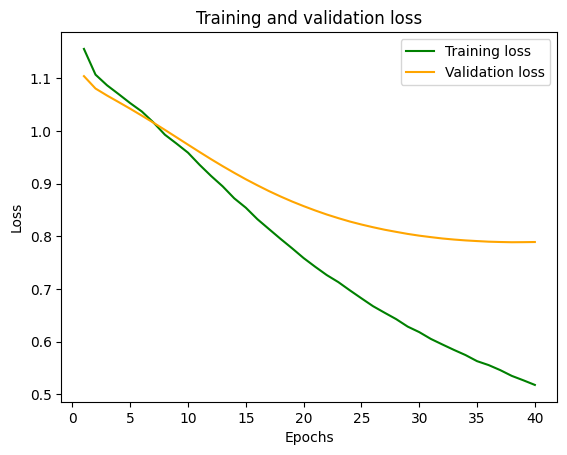

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = 'Green', label = 'Training loss')
plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


as shown in the graph the model is overfitting since the loss flattens out but the training loss contunies to fall

chart the  accuracy on the train and validation data

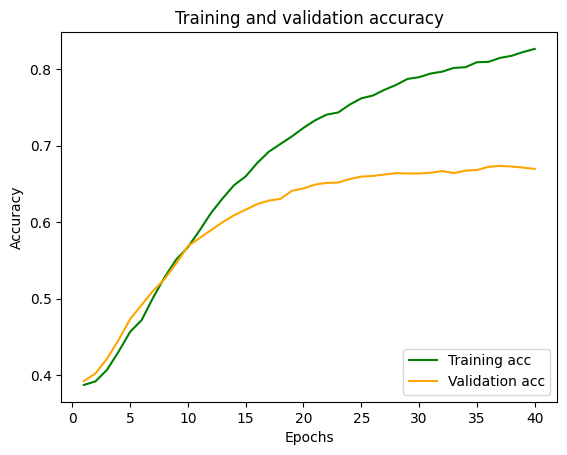

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()


the overfitting is shown here as well since the training accuracy climbs through training but the validation accuracy flattens out

 ### including the pre-proccessing step as a part of the model itself

In [ ]:
export_model = Sequential([
    tfidf_vectoriser,
    dnn_model
])

export_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.00001),
    metrics = ["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
loss , loss1 , accuracy, accuracy1 = export_model.evaluate(raw_test_ds)
#print(accuracy)
export_model.evaluate(raw_test_ds)
print(export_model.metrics_names)

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6692 - loss: 0.0000e+00
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6692 - loss: 0.0000e+00
['loss', 'loss', 'compile_metrics', 'compile_metrics']


#Using and Generating Embeddings on the input texts

instead of using count or TF-IDF vectors, generating embeddings is a different approach.

Embeddings are a dense vector represenation of texts that capture the sementics and relationships between the words

First setup the vectorised layer to produce integer sequences to represent words

In [ ]:
vocab_size = 10000
sequence_length = 250

vectoriser_layer = layers.TextVectorization(
    standardize = custom_normalisation,
    max_tokens = vocab_size,
    output_mode = "int",
    output_sequence_length = sequence_length
)

Build up the vocabulary

In [ ]:
train_text = raw_train_ds.map(lambda x, y: x)
vectoriser_layer.adapt(train_text)


setup the helper function

In [ ]:
def vectorise_text(text, label):

  text = tf.expand_dims(text, -1)
  return vectoriser_layer(text), label

use the helper function to pre-process the sets

In [ ]:
train_ds = raw_train_ds.map(vectorise_text)
val_ds = raw_val_ds.map(vectorise_text)
test_ds = raw_test_ds.map(vectorise_text)

setup optimisation for the data loading as well

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

this time inturoduce additional configuration options for the neural network training such as callbacks

In [ ]:
callbacks_list = [
    keras.callback.EarlyStopping(
        monitor = "val_accuracy",
        patience = 3
    ),
    keras.callback.ReduceLROnPlateau(
        factor = 0.1,
        patience = 1
    )
]

 setup the same model arch. with the embedding layer and GlobalAveragePooling1D layer

In [ ]:
embbedding_dim = 64

model = Sequential([
    layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(32, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(3)
])

model.summary()

the first layer is the embeddig layer which will accept the input from the vectorised layer and genereate embedding our data.

this is a trainable layer.

the GlobalAveragePooling1D layer compresses the the output of the embeddinng layer into a 2-D tensor which helps in reducing paramaters and mitigates overfitting.

configure the model, training parameters and start training

In [ ]:
model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

history = model.fit(
    train_ds,
    epochs = 50,
    validation_data = val_ds,
    callbacks = callbacks_list
)

Evalute the model

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

Graph a line chart showing the training and validation loss over epochs of training

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = 'Green', label = 'Training loss')
plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Graph a line chart showing the training and validation accuracy over the training

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

 # Training the model but with a simple RNN

uses the same vectorised layer as before as well as the embedding layer

In [ ]:
embedding_dim = 128

rnn_model = Sequential()

rnn_model.add(layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim))
rnn_model.add(layers.SimpleRNN(128, return_sequences = True))
rnn_model.add(layers.GlobalAveragePooling1D())
rnn_model.add(layers.Dense(3, activation = "softmax"))

rnn_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer = optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

history = rnn_model.fit(
    train_ds,
    epochs = 20,
    validation_data = val_ds,
    callbacks = callbacks_list
)

Evalute the RNN model

In [ ]:
loss, accuracy = rnn_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

Graph the training and validation loss over the training

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = 'Green', label = 'Training loss')
plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Graph the training and validation accuracy over the training

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

# Using LSTM RNN

setup and embedding and GlobalAveragePooling1D layer.

Also used a spatialDropout layer cause it drops 1D features maps instead of indvidual elements which will help mitigate the overfitting shown in the simple RNN

In [ ]:
embedding_dim = 128

lstm_model = Sequential()

lstm_model.add(layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim))
lstm_model.add(layers.SpatialDropout(0.25)
lstm_model.add(layers.LSTM(128, Dropout = 0.6, return_sequences = True))
lstm_model.add(layers.GlobalAveragePooling1D())
lstm_model.add(layers.Dense(32, activation = "tanh"))
lstm_model.add(layers.Dense(3, activation = "softmax"))

lstm_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer = optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

history = lstm_model.fit(
    train_ds,
    epochs = 20,
    validation_data = val_ds,
    callbacks = callbacks_list
)

Evalute the model

In [ ]:
loss, accuracy = lstm_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

Graph the training and validation loss over the training

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = 'Green', label = 'Training loss')
plt.plot(epochs, val_loss, color = "orange", label = "Validation")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Graph the training and validation accuracy over training

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

# Save the best preformance model

as shown in the previous sections the LSTM model is the best preforming model

first export the model with the vectorised layer as a part of the model. this will allow the feeding of raw inputs to the model and get predictions without the need for the preproccessing of the inputs

In [ ]:
export_model = Sequential([
    vectoriser_layer,
    lstm_model
])

export_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer = optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

# Test it with the raw_test_ds
export_model.evaluate(raw_test_ds)

# Use the saved model for predictions on some examples

In [ ]:
examples = [
  "this experience has been the worst, want my money back",
  "this AI related article is very good",
  "The movie was average" ]

export_model.predict(examples)

as shown in the output, it is specified in terms of probability scores for each possible class and the class with the highest probability score will be the predicted label of the model

use np.argmax to get the highest probabilty score

In [ ]:
np.argmax(export_model.predict(examples), axis = 1)

as shown in the output the first example belongs to negative hence 0 , the second belongs to positive hence 2, and the third belongs to neutral hence 1

run predictions on the data and get a classfication report

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

predictions = export_model.predict(X_test["text"].values)
y_pred = np.argmax(predictions, axis = 1)

y_test = X_test["sentiment"]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = None)
precision = precision_score(y_test, y_pred, average = None)
recall = recall_score(y_test, y_pred, average = None)

# Get Classification Report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

Serializing the model out to disk

In [ ]:
lstm_model.save("sentiment_predictor.keras")

Reloading the model

In [ ]:
# loading a saved model
loaded_model = models.load_model("sentiment_predictor.keras")

# evalute the loaded model to make sure it is the same model
loss, accuracy = loaded_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)